In [1]:
with open("day12.txt") as file:
    data = file.read().split("\n")

In [2]:
import string
import numpy as np
level = dict()
for i,n in enumerate(string.ascii_lowercase):
    level[n] = i

level["S"] = 0
level["E"] = 26
     


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
start = None
end = None
num_data = list()
for y, d in enumerate(data):
    num_data.append([level.get(i) for i  in d])
    for  x,i in enumerate(d):
        if i == "S":
            start = (x,y+1)
        if i=="E":
            end = (x,y+1)
num_data = np.array(num_data)

df = pd.DataFrame(num_data, columns = range(0,len(data[0])),
  index = range(0,len(data)))


In [4]:
num_data = dict()
start = None
end = None
for y, d in enumerate(data):
    for x,val in enumerate(d) :
        num_data[(x,y)] = level.get(val)
        if val =="S":
            print("start:",x,y)
            start =  (x,y)
        if val=="E":
            print("End:",x,y)
            end =(x,y)
   

start: 0 20
End: 107 20


In [5]:

move = [(-1,0),(+1,0),(0,1),(0,-1)]
graph =dict()
for (i,j),v in num_data.items():
    node = set()
    for (x,y) in move:
        if (i+x,j+y) in num_data:
            if num_data[(i+x,j+y)] <= v+1:
                node.add((i+x,j+y))
    graph[(i,j)] = node
    

In [6]:
def shortest_path(graph, node1, node2):
    path_list = [[node1]]
    path_index = 0
   
    previous_nodes = {node1}
    if node1 == node2:
        return path_list[0]
        
    while path_index < len(path_list):
        current_path = path_list[path_index]
        last_node = current_path[-1]
        next_nodes = graph[last_node]
       
        if node2 in next_nodes:
            current_path.append(node2)
            return current_path
    
        for next_node in next_nodes:
            if not next_node in previous_nodes:
                new_path = current_path[:]
                new_path.append(next_node)
                path_list.append(new_path)
                
                previous_nodes.add(next_node)
       
        path_index += 1
    # No path is found
    
    return False

In [7]:
#part 1
shortest = shortest_path(graph, start, end)

In [8]:
len(shortest_path(graph, start, end))-1

449

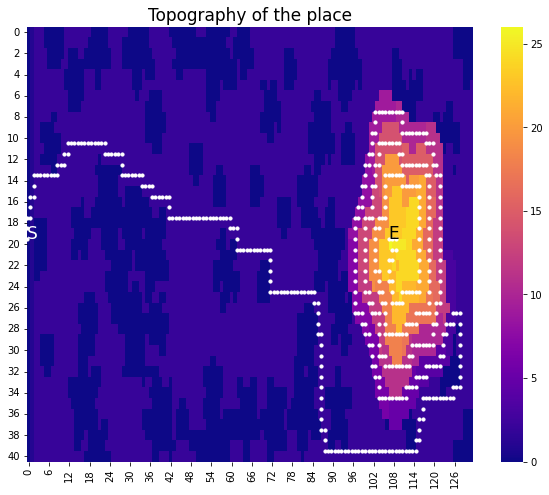

In [9]:
ax = plt.axes()
sns.heatmap(df, annot = False, cbar = True, cmap = 'plasma',ax=ax)
ax.set_title("Topography of the place",size=17)
plt.text(start[0],start[1],s="S",size=17,color="w")
plt.text(end[0],end[1],s="E",size=17)
for (i,j) in shortest:
    plt.scatter(i,j,s=10,color ="w")

plt.gcf().set_size_inches(10, 8)

In [10]:
#part 2
all_a = [point for point,level in num_data.items() if level==0 and point!=start]
print(f"{len(all_a)} points de départ potentiels")

1635 points de départ potentiels


In [11]:
%%time
new_path = None
len_new_path = 450
for a in all_a :
    path =  shortest_path(graph, a, end)
    if path and len(path)<len_new_path:
        new_path = path
        len_new_path = len(path)

CPU times: user 1.11 s, sys: 23.4 ms, total: 1.13 s
Wall time: 1.14 s


In [12]:
 print(len_new_path-1)


443


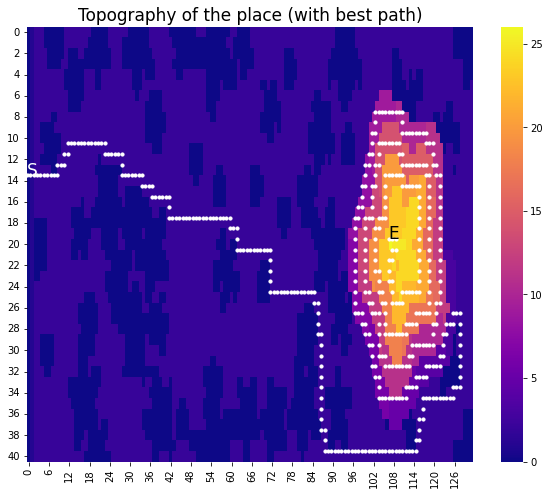

In [13]:
start =new_path[0]
ax = plt.axes()
sns.heatmap(df, annot = False, cbar = True, cmap = 'plasma',ax=ax)
ax.set_title("Topography of the place (with best path)",size=17)
plt.text(start[0],start[1],s="S",size=17,color="w")
plt.text(end[0],end[1],s="E",size=17)
for (i,j) in new_path:
    plt.scatter(i,j,s=10,color ="w")

plt.gcf().set_size_inches(10, 8)